In [1]:
# Standard imports
import pandas as pd
import numpy as np
import logomaker
import time

%matplotlib inline
import matplotlib.pyplot as plt

# Import marginalization function
from utils import x_to_ct_df

# For drawing rectangles
from matplotlib.patches import Rectangle
pink = np.array([247, 198, 219])/256
purple = np.array([126, 66, 149])/256
red = np.array([228, 33, 63])/256

# Set figure font properties
from matplotlib.font_manager import FontProperties
figtext_font = FontProperties()
figtext_font.set_weight('semibold')
figtext_font.set_size('9')

# Load figure style
plt.style.use('fig_style.txt')

ApA: ...
ApC: ...
ApG: ...
ApU: ...
CpA: ...
CpC: ...
CpG: ...
CpU: ...
GpA: ...
GpC: ...
GpG: ...
GpU: ...
UpA: ...
UpC: ...
UpG: ...
UpU: ...
Execution time:51.97 sec.


<ipython-input-2-dd3cf43f5694>:110: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


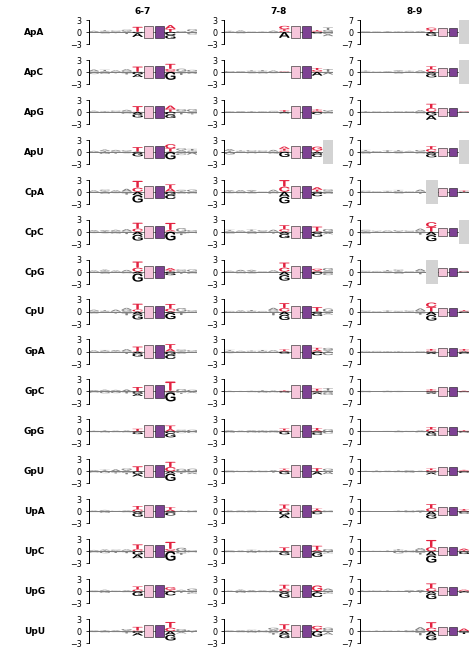

In [2]:
# Create list of dinucs and dinuc display names
dinucs = [b1+b2 for b1 in 'ACGT' for b2 in 'ACGT']
primers = [(d[0]+'p'+d[1]).replace('T','U') for d in dinucs]
dinucs = dinucs[:]  # For testing
nrows = len(dinucs)
row_height = 9/16

# Create list of TSS positions
logo_poss = [6,7,8]
logo_poss_display = [f'{pos}-{pos+1}' for pos in logo_poss]
ncols = len(logo_poss)

# Set replicate
rep = 'rep2'

# Set figsize
figsize=[6.5, nrows*row_height]

# Create figure
#fig, axs = plt.subplots(ncols, ncols, figsize=figsize)
fig = plt.figure(constrained_layout=True, figsize=figsize)
gs = fig.add_gridspec(nrows=nrows, ncols=ncols+1,
                      width_ratios=[.5,1,1,1],
                      left=.1, top=.1, right=.99, bottom=.05,
                      wspace=.2, hspace=.2)

# Draw logos within figure
t = time.time()
for i, dinuc in enumerate(dinucs):

    primer = primers[i]
    print(f'{primer}: ', end='')
    
    # Draw primer
    ax = fig.add_subplot(gs[i,0])
    ax.set_ylim([0,1])
    ax.set_xlim([0,1])
    ax.text(x=.5, y=.5, s=primer, ha='center', va='center', 
            fontproperties=figtext_font)
    ax.axis('off')
    
    # For each position to display
    for j, pos in enumerate(logo_poss):

        # Provided feedback on progress
        print('.', end='')

        # Load logo
        logo_file_name = f'csv_logos/invivo_p{pos}_{primer}_{rep}_logo.csv'
        logo_df = pd.read_csv(logo_file_name, index_col=0)

        # Draw logo
        ax = fig.add_subplot(gs[i,j+1])
        ax.set_clip_on(False)
        logo = logomaker.Logo(df=logo_df,
                               ax=ax,
                               font_name='Arial Rounded MT Bold',
                               show_spines=False,
                               flip_below=False)
        ax.spines['left'].set_visible(True)

        # Color logo
        logo.style_glyphs(color=red)
        logo.style_glyphs_below(color='k')
        for c in 'ACGT':
            for k in range(1,11):
                if (k != pos-1) and (k != pos+2):
                    logo.style_single_glyph(c=c, p=k, color='gray')
                
        # Determine ylims
        logo_height = np.max(np.sum(np.abs(logo_df), axis=1))
                
        # Style plot
        if i==0:
            ax.set_title(logo_poss_display[j], fontproperties=figtext_font)
        if j==2:
            yticks=[-7,0,7]
            ylim=[-7, 7]
            rect_height = 7*2/3
        else:
            yticks=[-3,0,3]
            ylim=[-3, 3]
            rect_height = 3
        ax.set_yticks(yticks)
        ax.set_ylim(ylim)
        height = ylim[1]-ylim[0]
        ax.set_xticks([])
        ax.tick_params(axis='x', length=0)
        
        # Gray out positions with zero entries
        for l in logo_df.index:
            if l not in [pos, pos+1]:
                if (logo_df==0).all(axis=1)[l]:
                    patch = Rectangle((l-.5, ylim[0]), 1, height, 
                                      facecolor='lightgray', edgecolor='lightgray')
                    ax.add_patch(patch)
        
        # Create rectangular patches
        rect_kwargs = {'linewidth':.5, 'edgecolor':'k'}
        ax.add_patch(Rectangle((pos-.4,-.5*rect_height), .8, rect_height, facecolor=pink, **rect_kwargs))
        ax.add_patch(Rectangle((pos+.6,-.5*rect_height), .8, rect_height, facecolor=purple, **rect_kwargs))

    # Feedback
    print('')
    
# Show execution time
print(f'Execution time:{time.time()-t:.2f} sec.')

# Tighten layout and save
fig.show()
fig.savefig(f'figures/fig_S5_invivo_{rep}_logos.pdf')